In [33]:
from PyUoI.UoINMF import UoINMF
from activ import load_data
from activ.data_normalization import data_normalization
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import NMF
from datetime import  datetime
import h5py
import sys
import os
import matplotlib.pyplot as plt
from activ.analytics import nmf_bases_heatmap

In [34]:
data = load_data()

In [35]:
data_oc = data_normalization(data.outcomes, 'positive')
data_bm = data_normalization(data.biomarkers, 'positive')

In [36]:
data_bm.shape

(247, 235)

In [14]:
UoINMF?

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(9, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(6, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(7, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(6, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(5, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(5, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(4, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(4, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(3, 177)


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1035: ConvergenceWarning: Maximum number of iteration 400 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, Converge

(3, 177)


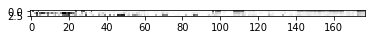

In [9]:
min_pts = np.arange(5,55,5)
ranks = list(range(2,20))

for jj,m in enumerate(min_pts):
    uoinmf = UoINMF(ranks=ranks,
                dbscan=DBSCAN(min_samples=m),
                nmf=NMF(beta_loss='kullback-leibler', solver='mu', max_iter=400, init='random'))
    decomp = uoinmf.fit(data_oc)
    H = decomp.components_
    print(H.shape)
    plt.imshow(H, cmap='gray_r')
    


In [1]:
import activ.analytics

In [2]:
dir(activ.analytics)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'heatmap',
 'make_axes_locatable',
 'nmf_bases_heatmap',
 'nmf_boxplot',
 'nmf_heatmap',
 'np',
 'outcomes_histogram',
 'plt']

In [28]:
db = DBSCAN(eps=.6, min_samples=50)
uoinmf = UoINMF(ranks=list(range(2,20)),dbscan=db)
uoinmf.fit(data_oc)


UoINMF(dbscan=DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None),
    lasso=None, n_boostraps_u=None, n_bootstraps_i=10,
    nmf=NMF(alpha=0.0, beta_loss='kullback-leibler', init=None, l1_ratio=0.0,
  max_iter=400, n_components=19, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0),
    random_state=None,
    ranks=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

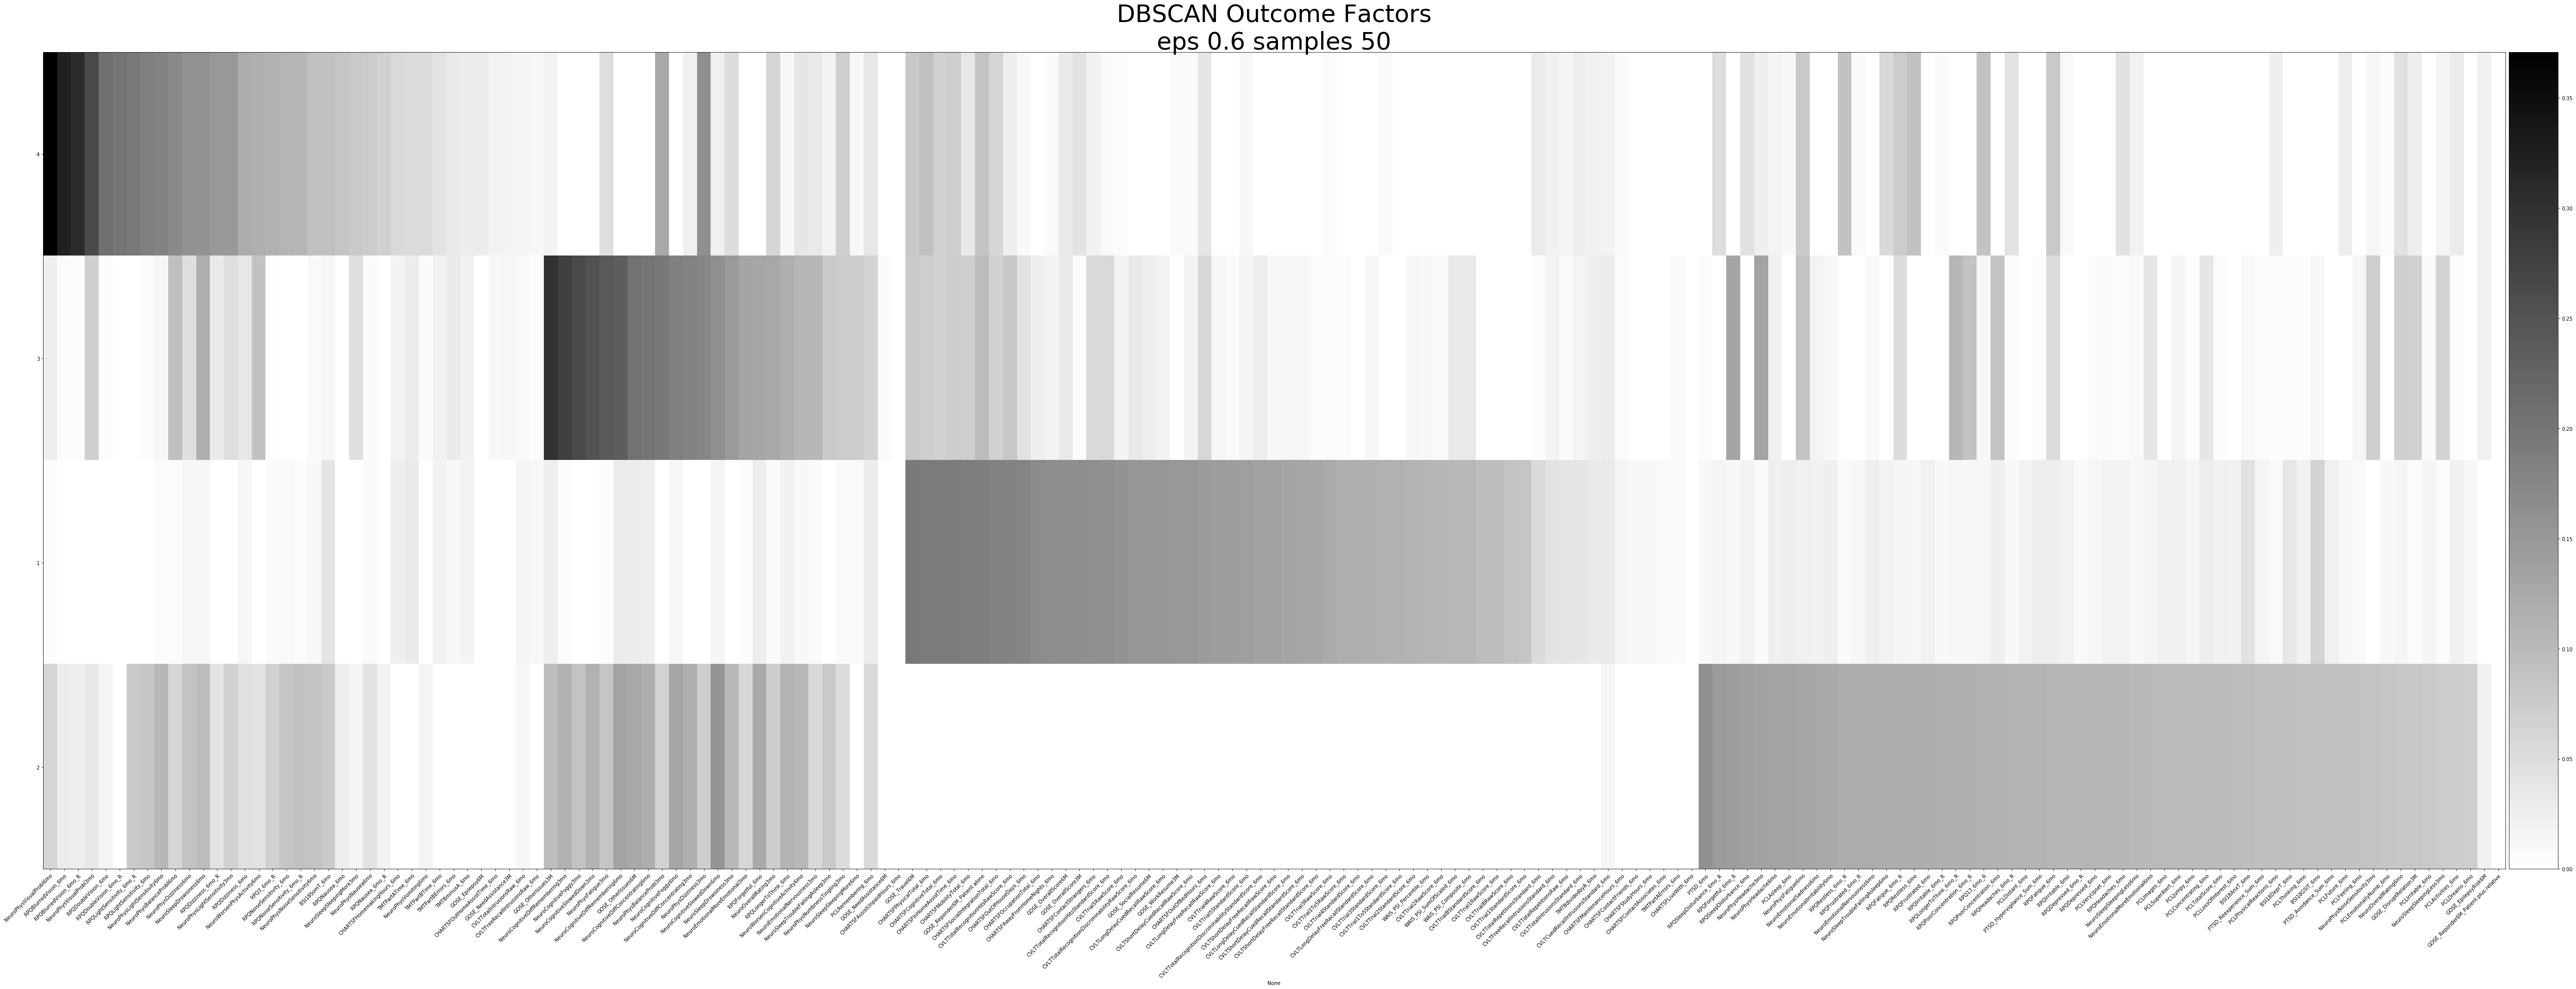

In [29]:
plt.figure(figsize=(90,30))
nmf_bases_heatmap(uoinmf.components_, data.outcome_features, sort=True, ax=None, aspect='auto',
                  title='DBSCAN Outcome Factors\neps 0.6 samples 50')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_oc.pdf')

In [38]:
# biomarkers
db_bm = DBSCAN(eps=.6, min_samples=55)
uoinmf_bm = UoINMF(ranks=list(range(2,20)),dbscan=db_bm)
uoinmf_bm.fit(data_bm)


UoINMF(dbscan=DBSCAN(algorithm='auto', eps=0.6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=55, n_jobs=1, p=None),
    lasso=None, n_boostraps_u=None, n_bootstraps_i=10,
    nmf=NMF(alpha=0.0, beta_loss='kullback-leibler', init=None, l1_ratio=0.0,
  max_iter=400, n_components=19, random_state=None, shuffle=False,
  solver='mu', tol=0.0001, verbose=0),
    random_state=None,
    ranks=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

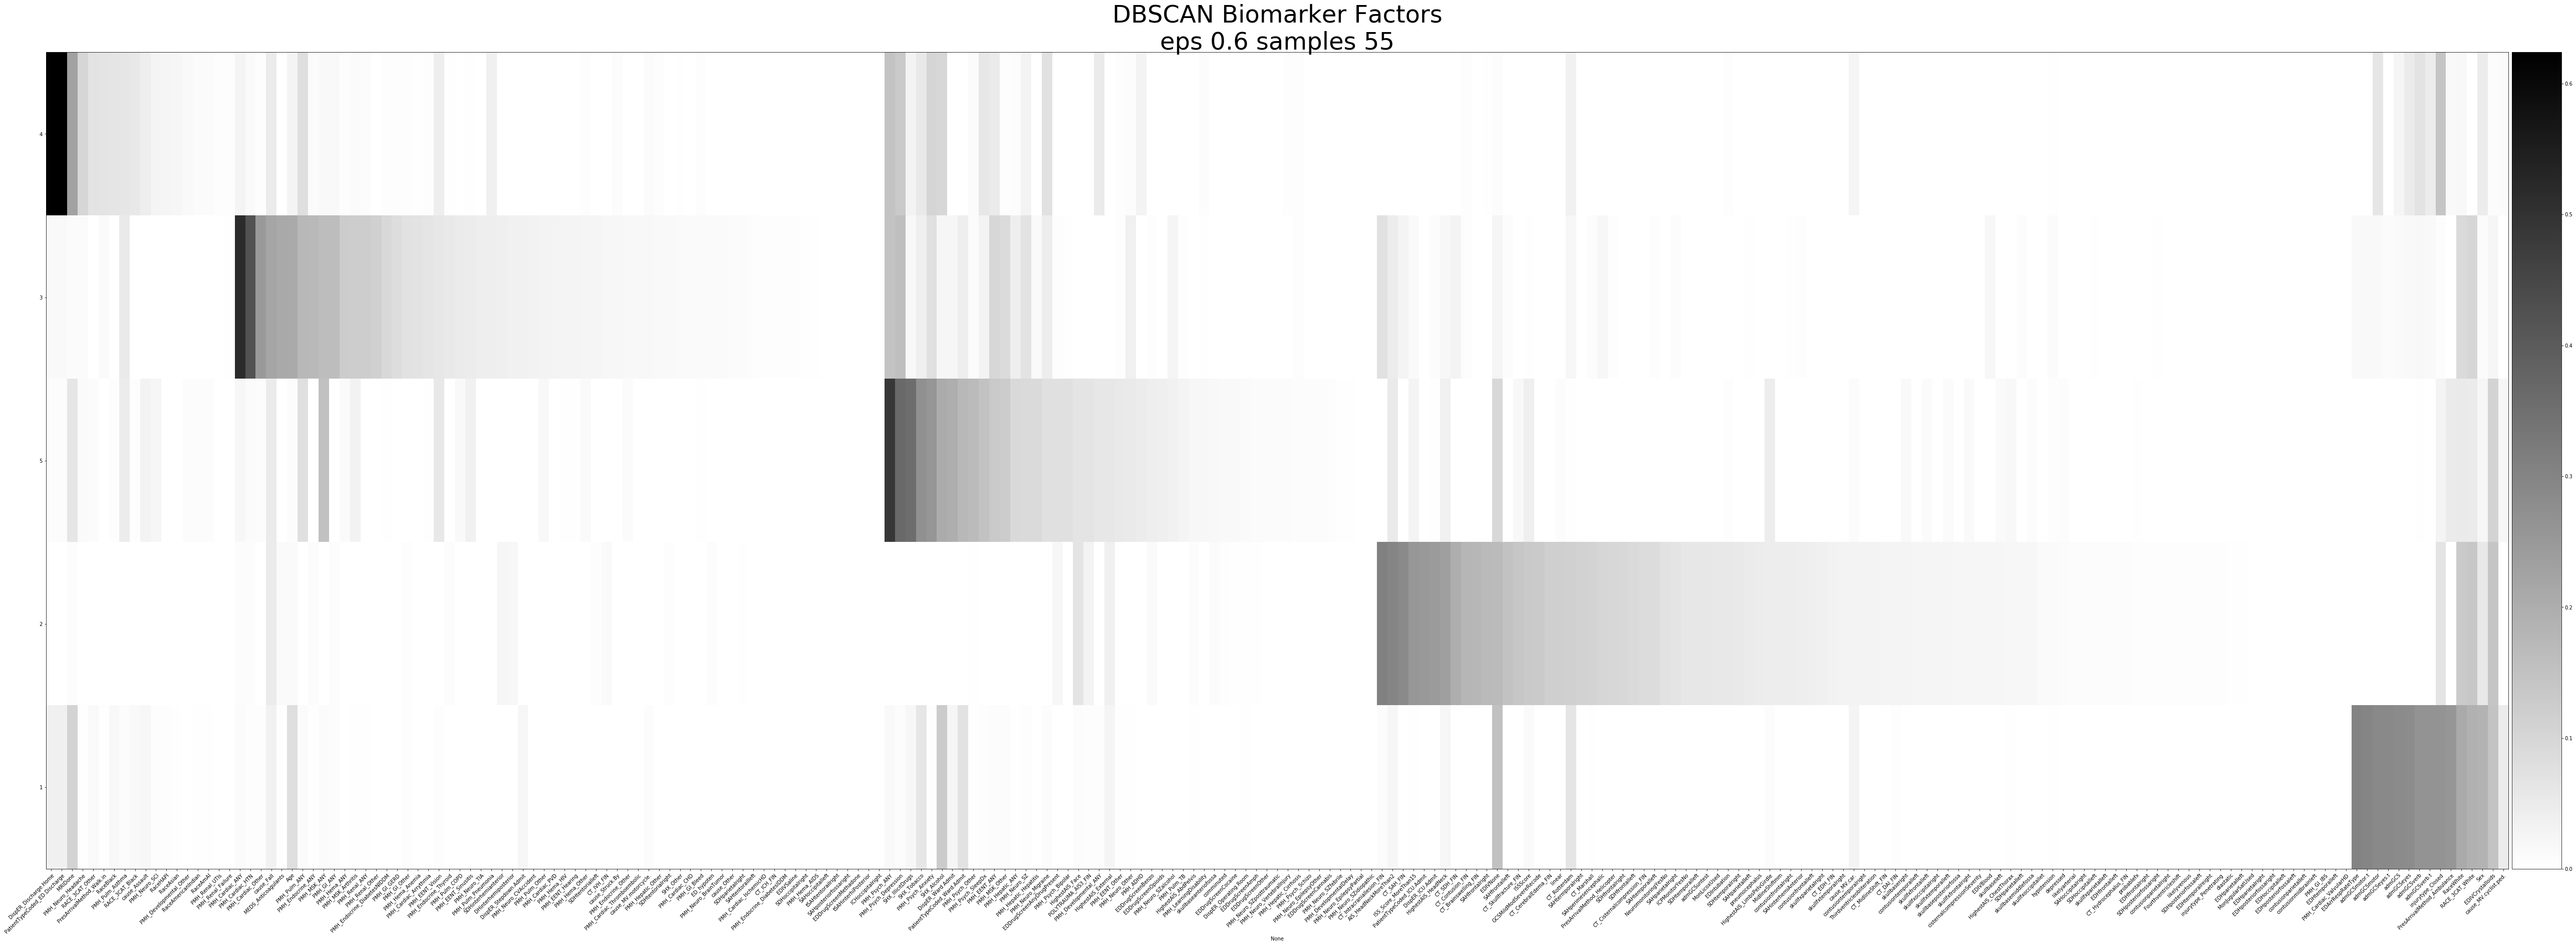

In [41]:
plt.figure(figsize=(90,30))
nmf_bases_heatmap(uoinmf_bm.components_, data.biomarker_features, sort=True, ax=None, aspect='auto',
                  title='DBSCAN Biomarker Factors\neps 0.6 samples 55')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_bm.pdf')